
 [[0 1995 1 24.9 10.7]
 [0 1995 2 27.7 15.0]
 [0 1995 3 33.0 19.5]
 ..., 
 [31 2012 10 31.6 24.3]
 [31 2012 11 30.6 18.3]
 [31 2012 12 27.7 16.4]] 

Prediction Result:  [ 102.6  739.4  502.6 ...,    4.2    4.   424.4]
R-squared test score: 0.706


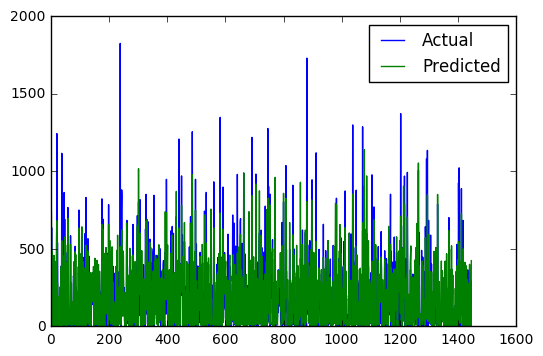

In [1]:
# KNN regression applied in Bangladesh rainfall data
import pandas as pd
import numpy as np

#importing the dataset
dataset = pd.read_csv('data/rainfall_bd_2.csv')

#dataset=dataset.fillna(0)

#dataset['Month_Total']=dataset.iloc[:,5:].sum(axis=1)

#result of independentvariable
X = dataset.iloc[:,0:5].values # considering all station name

#result of dependent variable
y = dataset.iloc[:,36].values

#taking careof missing data
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
X[:,0]= labelencoder_X.fit_transform(X[:,0])
print("\n",X,"\n")

#y=y.astype(int)

X = np.array(X)
y = np.array(y)

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20,random_state = 33)


from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(X_train,y_train)

predicted1 = neigh.predict(X_test)
print("Prediction Result: ",predicted1)

print('R-squared test score: {:.3f}'.format(neigh.score(X_test,y_test))) # R-Squared test score

import matplotlib.pyplot as plt
plt.plot(y_test,label='Actual')
plt.plot(predicted1,label='Predicted')
plt.legend()
plt.show()